# **Imports:**

----

In [1]:
from requests import get
from bs4 import BeautifulSoup
import os
import requests
import pandas as pd
import unicodedata
import re
import json

import matplotlib.pyplot as plt

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords


from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import acquire
import prepare

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

-----

# **Acquire:**

In [2]:
#utilizing json file created from acquire.py, using pandas read json to create a dataframe
df = pd.read_json('data2.json')

In [3]:
df.head()

,repo,language,readme_contents
0,IrisShaders/Iris,Java,![Iris: An open-source shaders mod compatible ...
1,returntocorp/semgrep,Java,"</br>\n<p align=""center"">\n <a href=""https:..."
2,CaffeineMC/sodium-fabric,Java,"<img src=""src/main/resources/assets/sodium/ico..."
3,keycloak/keycloak,Java,# Keycloak\n\nKeycloak is an Open Source Ident...
4,NationalSecurityAgency/ghidra,Java,"<img src=""Ghidra/Features/Base/src/main/resour..."


In [4]:
#initial is 225 records x 3 fields, all are objects.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             225 non-null    object
 1   language         225 non-null    object
 2   readme_contents  225 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


------

To Do's:

1.) drop duplicates, drop nans

2.) lower case language and repo columns, and readme_contents as well.

3.) drop non alpha-numeric values.

4.) Drop words which are excessively long, appears there is combination of words



------

# **Prepare:**

In [5]:
#utilizing prepare function which will retrun a df containing original columns and columns which have been normalized, lemmatized, tokenized and had stopwords removed or added.
df = prepare.prep_repo_data(df)

In [6]:
#looking at the initial and new columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 198
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   repo_name                174 non-null    object
 1   language                 174 non-null    object
 2   readme_contents          174 non-null    object
 3   repo_name_cleaned        174 non-null    object
 4   language_cleaned         174 non-null    object
 5   readme_contents_cleaned  174 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB


In [7]:
df.shape

(174, 6)

In [8]:
df.head(10)

,repo_name,language,readme_contents,repo_name_cleaned,language_cleaned,readme_contents_cleaned
0,IrisShaders/Iris,Java,![Iris: An open-source shaders mod compatible ...,irisshadersiris,java,iris opensource shaders mod compatible optifin...
1,returntocorp/semgrep,Java,"</br>\n<p align=""center"">\n <a href=""https:...",returntocorpsemgrep,java,br p aligncenter hrefhttpssemgrepdevimg srchtt...
2,CaffeineMC/sodium-fabric,Java,"<img src=""src/main/resources/assets/sodium/ico...",caffeinemcsodiumfabric,java,img srcsrcmainresourcesassetssodiumiconpng wid...
3,keycloak/keycloak,Java,# Keycloak\n\nKeycloak is an Open Source Ident...,keycloakkeycloak,java,keycloak keycloak open source identity access ...
4,NationalSecurityAgency/ghidra,Java,"<img src=""Ghidra/Features/Base/src/main/resour...",nationalsecurityagencyghidra,java,img srcghidrafeaturesbasesrcmainresourcesimage...
5,alibaba/Sentinel,Java,"<img src=""https://user-images.githubuserconten...",alibabasentinel,java,img srchttpsuserimagesgithubusercontentcom9434...
6,square/okhttp,Java,OkHttp\n======\n\nSee the [project website][ok...,squareokhttp,java,okhttp see project websiteokhttp documentation...
7,alibaba/nacos,Java,"\n<img src=""doc/Nacos_Logo.png"" width=""50%"" sy...",alibabanacos,java,img srcdocnacos_logopng width50 syt height50 n...
8,opensearch-project/OpenSearch,Java,"<img src=""https://opensearch.org/assets/brand/...",opensearchprojectopensearch,java,img srchttpsopensearchorgassetsbrandsvglogoope...
9,sqshq/piggymetrics,Java,[![Build Status](https://travis-ci.org/sqshq/P...,sqshqpiggymetrics,java,build statushttpstravisciorgsqshqpiggymetricss...


In [9]:
java_read_df = df[df.language_cleaned == 'java']


In [10]:
df['readme_contents_cleaned'] = df['readme_contents_cleaned'].str.findall('\w{1,18}').str.join(' ')


In [11]:
def lang_split(df):
    '''
    This function take in the readme data acquired
    performs a split and stratifies language_cleaned column.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=245, 
                                        stratify=df.language_cleaned)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=245, 
                                   stratify=train_validate.language_cleaned)
    return train, validate, test

In [12]:
#splitting the data into a train, validate and test set
train, validate, test = lang_split(df)

In [13]:
train.head()

,repo_name,language,readme_contents,repo_name_cleaned,language_cleaned,readme_contents_cleaned
8,opensearch-project/OpenSearch,Java,"<img src=""https://opensearch.org/assets/brand/...",opensearchprojectopensearch,java,img srchttpsopensearch orgassetsbrandsvgl ogoo...
196,r-spatial/mapview,R,---\noutput: github_document\n---\n\n```{r set...,rspatialmapview,r,output github_document r setup include false k...
95,mlr-org/mlr3misc,R,# mlr3misc\n\nPackage website: [release](https...,mlrorgmlr3misc,r,mlr3misc package website releasehttpsmlr3mi sc...
9,sqshq/piggymetrics,Java,[![Build Status](https://travis-ci.org/sqshq/P...,sqshqpiggymetrics,java,build statushttpstravisc iorgsqshqpiggymetr ic...
60,atom/atom,JavaScript,# Atom\n\n[![Build status](https://dev.azure.c...,atomatom,javascript,atom build statushttpsdevazur ecomgithubatom_a...


## df.copy for altering 

-----

# **Exploratory**:

In [14]:
java_read = ' '.join(train[train.language_cleaned == 'java'].readme_contents_cleaned)
python_read = ' '.join(train[train.language_cleaned == 'python'].readme_contents_cleaned)
r_read = ' '.join(train[train.language_cleaned == 'r'].readme_contents_cleaned)
javascript_read = ' '.join(train[train.language_cleaned == 'javascript'].readme_contents_cleaned)
all_content = ' '.join(train.readme_contents_cleaned)

In [15]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(train, "language_cleaned")

,n,percent
python,26,0.268041
javascript,26,0.268041
java,24,0.247423
r,21,0.216495


In [16]:
java_freq = pd.Series(java_read.split()).value_counts()
python_freq = pd.Series(python_read.split()).value_counts()
r_freq= pd.Series(r_read.split()).value_counts()
javascript_freq= pd.Series(javascript_read.split()).value_counts()
all_freq = pd.Series(all_content.split()).value_counts()

In [17]:
word_counts = (pd.concat([java_freq, python_freq, r_freq, javascript_freq, all_freq], axis=1, sort=True)
                .fillna(0)
                .apply(lambda s: s.astype(int)))



In [18]:
java_words = re.sub(r'[^\w\s]', '', java_read).split()
r_words = re.sub(r'[^\w\s]', '', r_read).split()
python_words = re.sub(r'[^\w\s]', '', python_read).split()
javascript_words = re.sub(r'[^\w\s]', '', javascript_read).split()
all_content_words = re.sub(r'[^\w\s]', '', all_content).split()


In [19]:
word_counts.columns = ['java', 'python', 'r', 'javascript', 'all_content']

In [20]:
word_counts.sort_values('python', ascending = False)

,java,python,r,javascript,all_content
yes,0,1014,0,9,1023
unknown,0,626,0,3,629
data,25,430,99,346,900
api,33,423,1,45,502
learning,1,388,9,3,401
...,...,...,...,...,...
impatient,0,0,0,2,2
impalacompanyprofi,0,0,0,1,1
impactsli,0,0,0,1,1
impactli,0,0,0,1,1


In [21]:
python_top_20 = word_counts.python.sort_values(ascending = False).head(20)

In [22]:
java_top_20 = word_counts.java.sort_values(ascending = False).head(20)

In [23]:
javascript_top_20 = word_counts.javascript.sort_values(ascending = False).head(20)

In [24]:
r_top_20 = word_counts.r.sort_values(ascending = False).head(20)

In [25]:
def ngram_charts(content, n):
    content_word_str = ' '.join(content)
    ngrams = (pd.Series(nltk.ngrams(content_word_str, n)).value_counts())
    ngrams.plot.barh()



In [26]:
def word_cloud(word_string, name):
    from wordcloud import WordCloud
    img = WordCloud(background_color='white', width=800, height=600).generate(word_string)
    print('-------------------')
    print(f'{name}')
    print('-------------------')
    plt.imshow(img)
    plt.axis('off')

In [27]:
java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
                      .value_counts()
                      .head(10))

java_bigrams.tail()

(spring, boot)                              10
(open, source)                              10
(make, sure)                                 9
(srchttpscloudgithu, busercontentcomass)     8
(p, p)                                       7
dtype: int64

<AxesSubplot:>

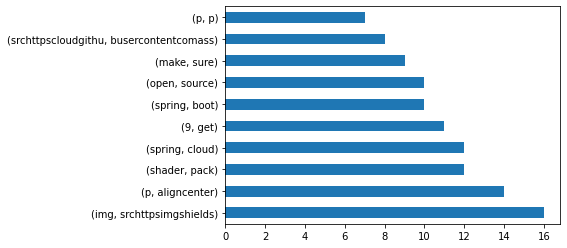

In [28]:
java_bigrams.plot.barh()

In [29]:
python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(10))

python_bigrams.head(40)

(yes, unknown)               536
(apikey, yes)                319
(machine, learning)          260
(yes, yes)                   211
(oauth, yes)                 106
(neural, network)            103
(natural, language)           69
(generalpurpose, machine)     60
(deep, learning)              54
(data, analysis)              50
dtype: int64

<AxesSubplot:>

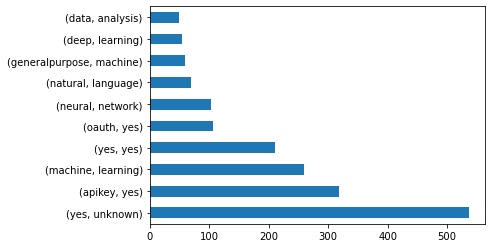

In [30]:
python_bigrams.plot.barh()

In [31]:
javascript_bigrams = (pd.Series(nltk.ngrams(javascript_words, 2))
                      .value_counts()
                      .head(10))

javascript_bigrams.head(40)

(freewarefreeware, icon)                    364
(target_blankimg, srchttpsopencollec)       335
(ul, li)                                    294
(opensource, softwareoss)                   235
(softwareoss, iconhttpsgithubcom)           205
(javascript, bad)                           111
(srchttpsopencollec, tivecomwebpackspon)    102
(hrefhttpsopencolle, ctivecomwebpackbac)    102
(srchttpsopencollec, tivecomwebpackback)    102
(hrefhttpsopencolle, ctivecomwebpackspo)    102
dtype: int64

<AxesSubplot:>

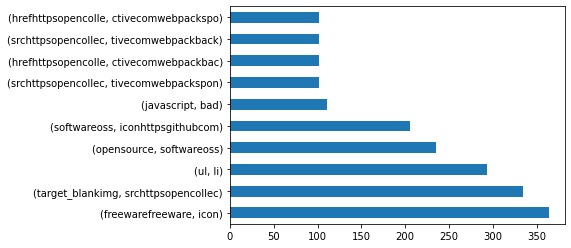

In [34]:
javascript_bigrams.plot.barh()

In [32]:
r_bigrams = (pd.Series(nltk.ngrams(r_words, 2))
                      .value_counts()
                      .head(10))

r_bigrams.head(40)

(data, mtcars)                              19
(time, series)                              19
(disp, data)                                15
(hp, disp)                                  15
(supernovalmmpg, hp)                        14
(deprecated, use)                           11
(r, evalfalse)                              11
(use, package)                              11
(badgehttpsimgshiel, dsiostaticv1stylef)    10
(mtcars, type)                              10
dtype: int64

<AxesSubplot:>

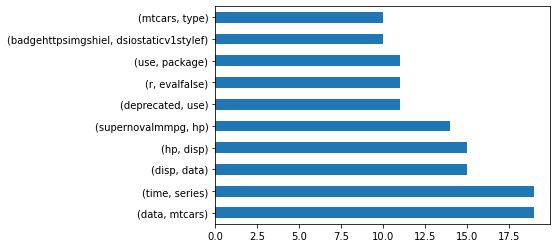

In [33]:
r_bigrams.plot.barh()

In [50]:
r_words_string = ' '.join(r_words)
p_words_string = ' '.join(python_words)
j_words_string = ' '.join(java_words)
js_words_string = ' '.join(javascript_words)

type(p_words_string)

str

-------------------
python
-------------------


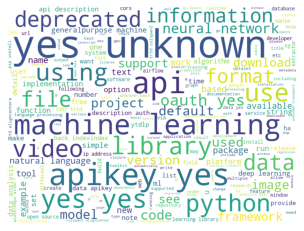

In [60]:
word_cloud(p_words_string, 'python')